# Algoritmo de Cluster - DBSCAN

Caio Rego
Disciplina: Aprendizado de Máquina
Professor: Luís Álvaro

In [487]:
import pandas as pd
import seaborn as sb
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN, KMeans

In [499]:
# Carrega os dados de um arquivo CSV
data = pd.read_csv('./dados/iris.csv')

# Remove a coluna com as classes
X = data.drop('target', axis=1)

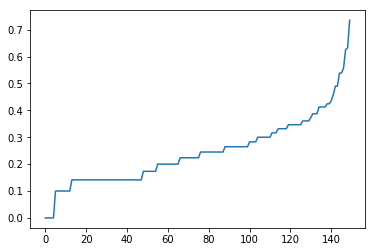

In [489]:
# Gera um gráfico que ajuda a descobrir o nº ideal do valor de EPS

nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [490]:
# Define os parâmetros do algoritmo DBSCAN inclusive o EPS
dbscan = DBSCAN(eps=.36, metric='euclidean', min_samples=8).fit(X)
print(dbscan)
print(len(Counter(dbscan.labels_)))

DBSCAN(algorithm='auto', eps=0.36, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=8, n_jobs=None, p=None)
3


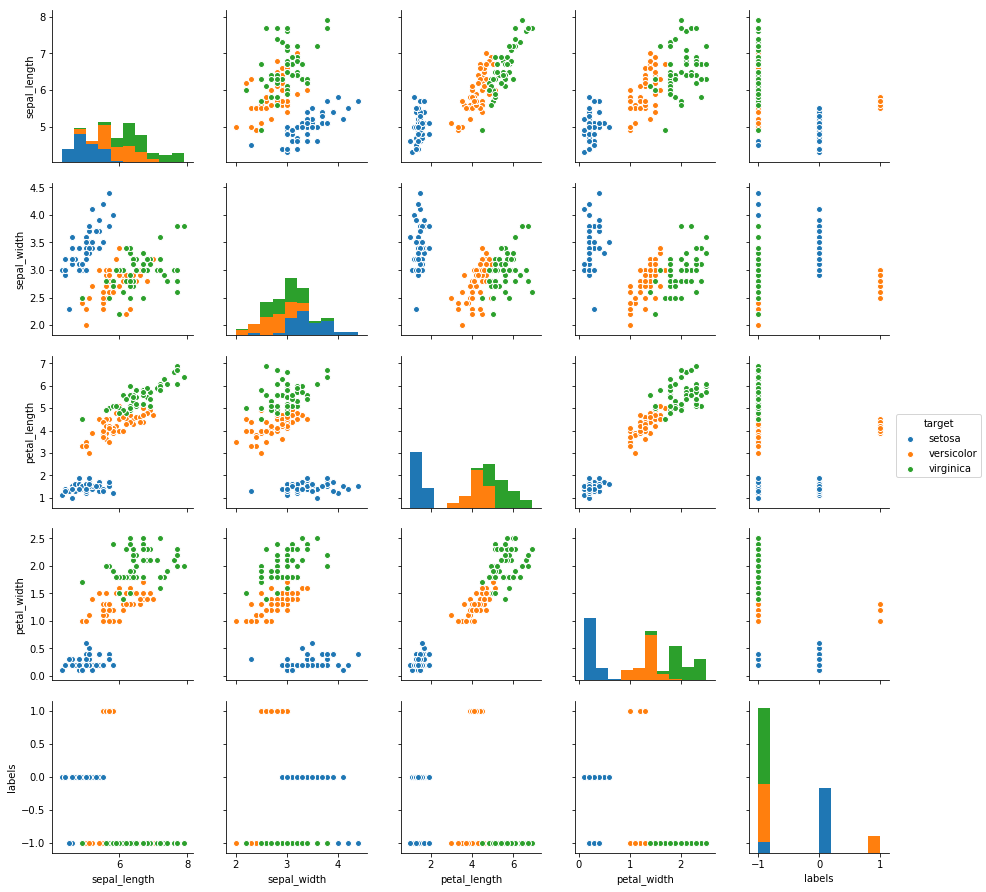

In [491]:
# Adiciona uma coluna no dataframe com os novos cluters
data['labels'] = dbscan.labels_

# Gera o gráfico com os grupos originais
sb.pairplot(data, hue='target')

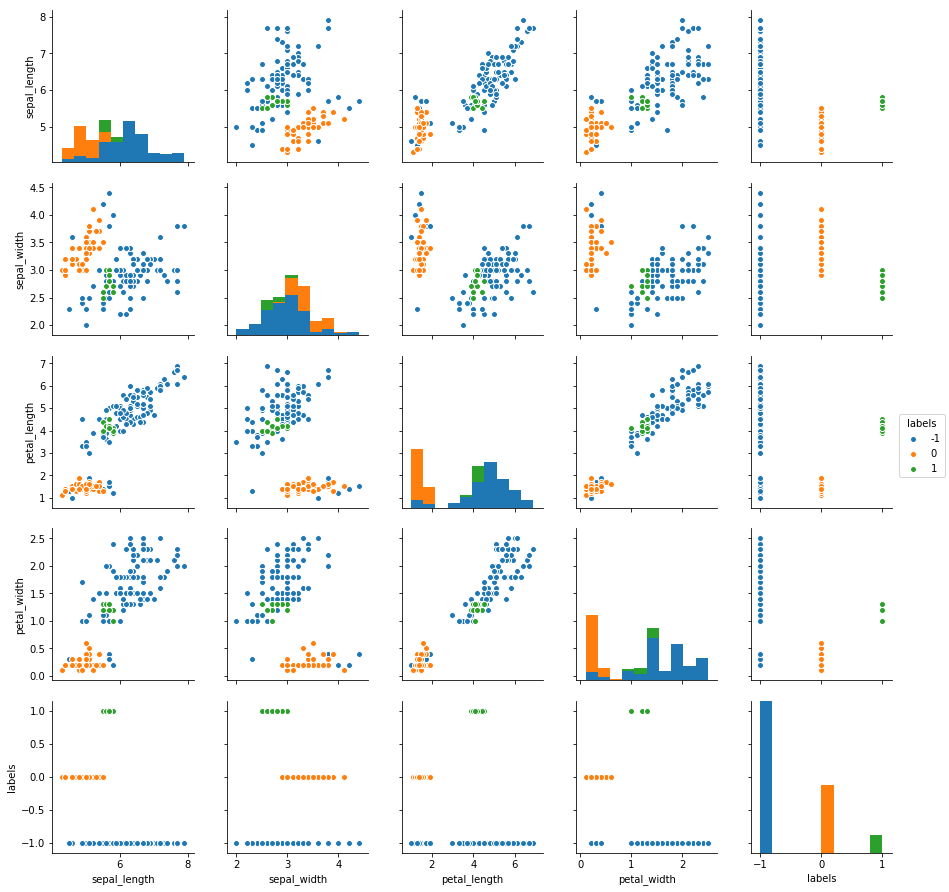

In [492]:
#Gera o gráfico com os grupos identificados pelo DBSCAN
sb.pairplot(data, hue='labels')

# Agora apresento os resultados gerados com outros dados

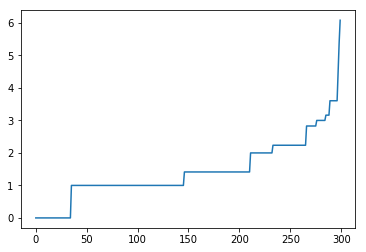

In [500]:
from IPython.display import Image
Image("./img/dbscan-aleatorio-n_cluster.png")

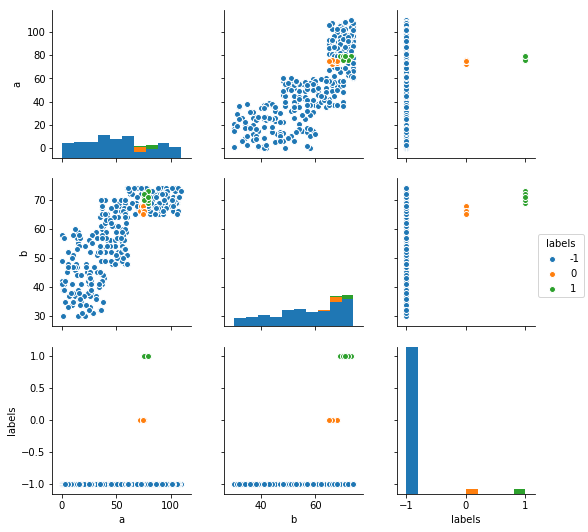

In [501]:
Image("./img/dbscan-aleatorio.png")

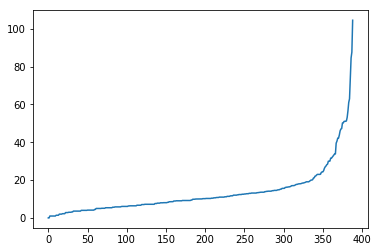

In [502]:
Image("./img/dbscan-densidade-n_cluster.png")

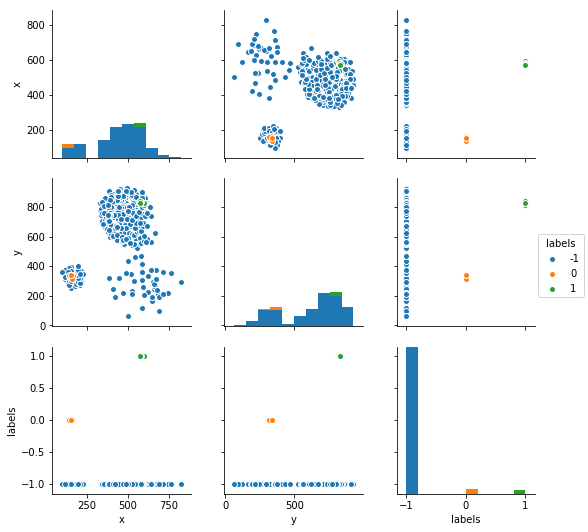

In [503]:
Image("./img/dbscan-densidade.png")

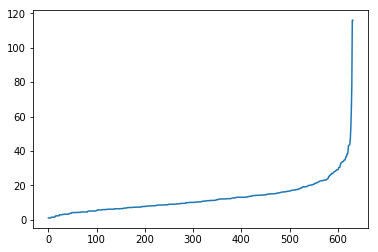

In [504]:
Image("./img/dbscan-linear-n_cluster.png")

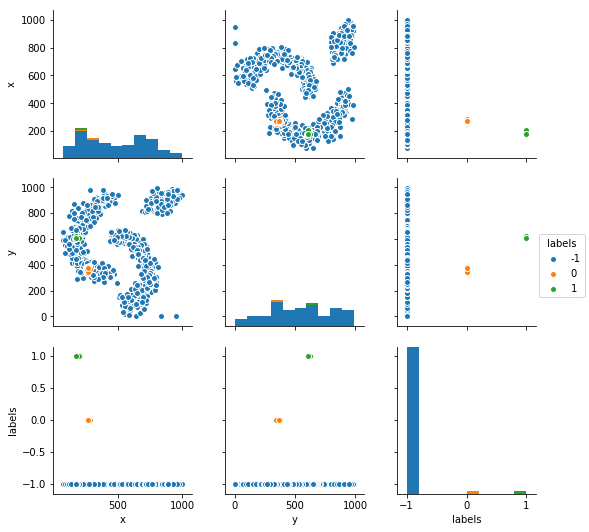

In [505]:
Image("./img/dbscan-linear.png")